In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

sns.set_theme()

In [3]:
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2025-10-04'

data = yf.download(ticker, start_date, end_date, progress=False)

In [25]:
roll_max = data.Close.cummax()
drawdown = (roll_max - data.Close) / roll_max
drawdown_to_plot = (-1 * drawdown).values.flatten()

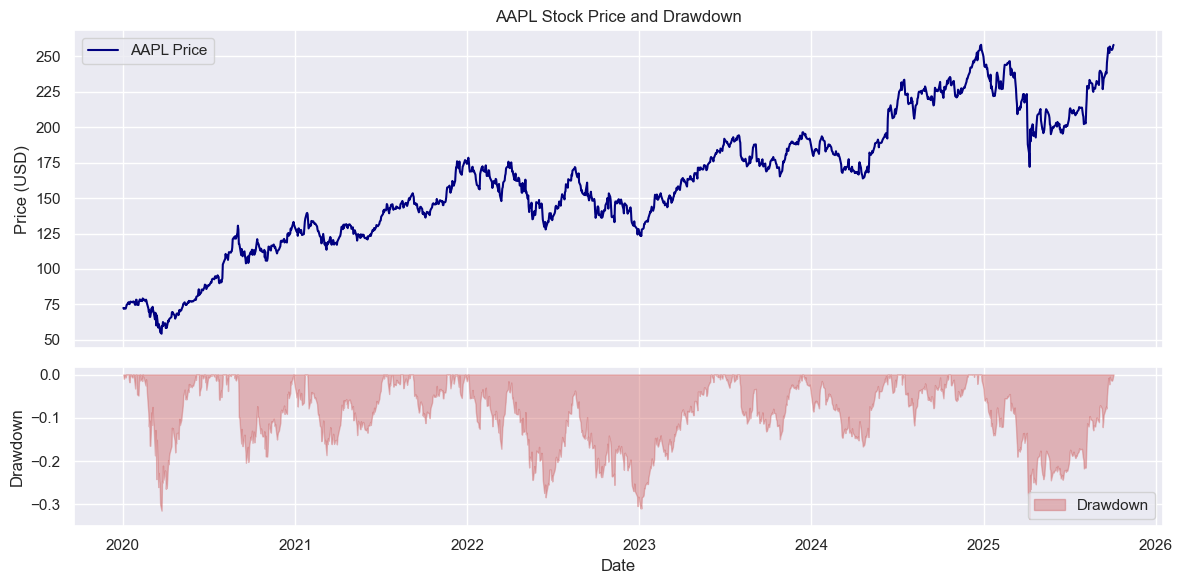

In [29]:
# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# Price chart
ax1.plot(data.index, data['Close'], label=f'{ticker} Price', color='navy')
ax1.set_title(f'{ticker} Stock Price and Drawdown')
ax1.set_ylabel("Price (USD)")
ax1.legend()

# Drawdown chart
ax2.fill_between(data.index, drawdown_to_plot, color='indianred', alpha=0.4, label="Drawdown")
ax2.set_ylabel("Drawdown")
ax2.set_xlabel("Date")
ax2.legend()

plt.tight_layout()
plt.show()